<a href="https://colab.research.google.com/github/Bilal-Ahmed-source/Assignment-3/blob/main/Bilal_Ahmed_DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Assignment 1

By: Bilal Ahmed

In [23]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device: /device:GPU:0
2.19.0


In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
    N = points_per_class  # points per class
    D = 2                 # input dimension
    K = num_classes       # number of classes
    X = np.zeros((N*K,D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

In [26]:
# Generate data
X, y = generate_harder_spiral_data()

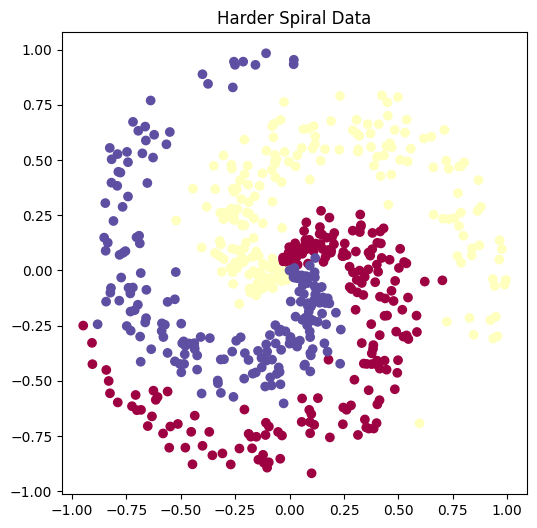

In [27]:
# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()

In [28]:
X.shape


(600, 2)

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()

model.add(Dense(8,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train,batch_size=50,epochs=400,verbose=1,validation_split=0.2)

Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.3380 - loss: 0.5026 - val_accuracy: 0.3333 - val_loss: 0.4701
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3390 - loss: 0.4909 - val_accuracy: 0.3333 - val_loss: 0.4515
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3349 - loss: 0.4708 - val_accuracy: 0.3333 - val_loss: 0.4335
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3245 - loss: 0.4620 - val_accuracy: 0.3333 - val_loss: 0.4163
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3400 - loss: 0.4313 - val_accuracy: 0.3333 - val_loss: 0.3995
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3400 - loss: 0.4041 - val_accuracy: 0.3333 - val_loss: 0.3832
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3228 - loss: 0.3845 - val_accuracy: 0.3333 - val_loss: 0.3677
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3477 - loss: 0.3726 - val_accuracy: 0.3333 - val_loss

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
# Predict
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("MLP with Sigmoid Accuracy:", accuracy_score(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
MLP with Sigmoid Accuracy: 0.2916666666666667


In [43]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='Pastel2', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set2', edgecolor='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


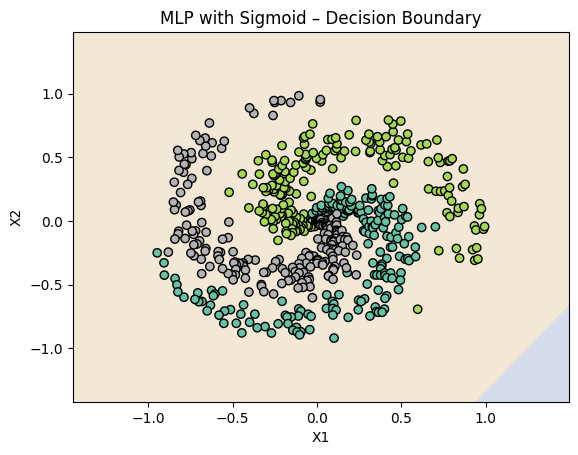

In [44]:
plot_decision_boundary(model, X, y, "MLP with Sigmoid – Decision Boundary")